In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
data, target = mnist["data"], mnist["target"]

In [27]:
import numpy as np

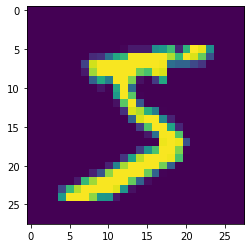

In [16]:
import matplotlib.pyplot as plt
pixels = data[0]
pixels = pixels.reshape(28,28)
plt.imshow(pixels)

In [44]:
def augment(data,target):
    aug_data = [_ for _ in data]
    aug_target = [_ for _ in target]

    for dx,dy in ((0,5),(0,-5),(5,0),(-5,0)):
        for x,y in zip(data,target):
            shifted_img = shift(x.reshape((28, 28)),[dx,dy],mode='constant', cval=0)
            aug_data.append(shifted_img.reshape(-1))
            aug_target.append(y)

    aug_data = np.array(aug_data)
    aug_target = np.array(aug_target)
    return aug_data, aug_target

In [45]:
train_x,test_x = augment(train_x,test_x)

In [42]:
from sklearn.model_selection import train_test_split

train_x, train_y, test_x, test_y = train_test_split(data, target,stratify=target, test_size=0.25)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_x,test_x)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
predictions = model.predict(train_y)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
accuracy_score(test_y,predictions)

0.9706285714285714

In [13]:
from scipy.ndimage import shift

In [15]:
shif

Help on function shift in module scipy.ndimage.interpolation:

shift(input, shift, output=None, order=3, mode='constant', cval=0.0, prefilter=True)
    Shift an array.
    
    The array is shifted using spline interpolation of the requested order.
    Points outside the boundaries of the input are filled according to the
    given mode.
    
    Parameters
    ----------
    input : array_like
        The input array.
    shift : float or sequence
        The shift along the axes. If a float, `shift` is the same for each
        axis. If a sequence, `shift` should contain one value for each axis.
    output : array or dtype, optional
        The array in which to place the output, or the dtype of the
        returned array. By default an array of the same dtype as input
        will be created.
    order : int, optional
        The order of the spline interpolation, default is 3.
        The order has to be in the range 0-5.
    mode : {'reflect', 'constant', 'nearest', 'mirror', 'wra